<a href="https://colab.research.google.com/github/HemantRajSingh/MovieMatch/blob/master/ExploratoryData_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#setup
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
'''data_files=[]
for i in range(2000,2024):
    #file_name= '../data/raw/movie_list_'+str( i)+'.csv'
    file_name= 'movie_list_'+str( i)+'.csv'
    data_files.append(file_name)
data_files
'''

"data_files=[]\nfor i in range(2000,2024):\n    #file_name= '../data/raw/movie_list_'+str( i)+'.csv'\n    file_name= 'movie_list_'+str( i)+'.csv'\n    data_files.append(file_name)\ndata_files\n"

In [3]:
#df = pd.concat(map(pd.read_csv,data_files), ignore_index=True)
df=pd.read_csv('../data/processed/preprocessed_dataset.csv')
df.tail(5)

,Unnamed: 0.1,Movie Title,Plot Summary,Cover Image,Year,Source,Rated,omdb Year,omdb Title,Released,...,Plot,Language,Country,Awards,Poster,Ratings,imdbRating,BoxOffice,imdbID,ProcessedPlot
5551,NaN,Memory (2023 film),"Sylvia, a single mother, social worker, and re...",upload.wikimedia.org/wikipedia/en/thumb/4/4e/M...,2023,https://en.wikipedia.org//wiki/Memory_(2023_film),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sylvia single mother social worker recovering ...
5552,NaN,The Color Purple (2023 film),"In 1909 Georgia, teenager Celie Harris lives w...",upload.wikimedia.org/wikipedia/en/thumb/7/70/C...,2023,https://en.wikipedia.org//wiki/The_Color_Purpl...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,georgia teenager celie harris life sister net...
5553,NaN,The Boys in the Boat (film),The film's plot centres on the University of W...,upload.wikimedia.org/wikipedia/en/thumb/6/63/B...,2023,https://en.wikipedia.org//wiki/The_Boys_in_the...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,film plot centre university washington crew re...
5554,NaN,Ferrari (2023 film),"In the summer of 1957, Italian entrepreneur En...",upload.wikimedia.org/wikipedia/en/thumb/f/f6/F...,2023,https://en.wikipedia.org//wiki/Ferrari_(2023_f...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,summer italian entrepreneur enzo ferrari prep...
5555,NaN,Good Grief (film),"In London, Marc enjoys a Christmas party with ...",upload.wikimedia.org/wikipedia/en/thumb/1/14/G...,2023,https://en.wikipedia.org//wiki/Good_Grief_(film),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,london marc enjoys christmas party friend oliv...


# Understanding data

In [4]:
df.shape #getting the rows and columns of dataset

(5556, 25)

In [5]:
df_2023= df[df['Year']==2023] # creating a new dataframe of year 2023

In [6]:
df_2023.shape #getting rows and columns for year 2023


(266, 25)

In [7]:
df['Plot Summary'][0]

"After the kind-hearted but clumsy Super Dave Osborne (Bob Einstein) survives a near-fatal accident, he discovers his manager has embezzled from him. This forces him into bankruptcy and causes him to lose his house. Super Dave decides to retire from stunt work, but ends up meeting a single mother named Sandy (Gia Carides). When Super Dave learns that Sandy's son, Timmy (Carl Michael Lindner) needs an expensive heart surgery, Super Dave comes out of retirement to raise the money. In the process, he must face off against his arch-enemy, Gil Ruston (Dan Hedaya).\n"

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   837 non-null    float64
 1   Movie Title    5556 non-null   object 
 2   Plot Summary   5556 non-null   object 
 3   Cover Image    5529 non-null   object 
 4   Year           5556 non-null   int64  
 5   Source         5556 non-null   object 
 6   Rated          791 non-null    object 
 7   omdb Year      816 non-null    object 
 8   omdb Title     816 non-null    object 
 9   Released       813 non-null    object 
 10  Runtime        808 non-null    object 
 11  Genre          815 non-null    object 
 12  Director       797 non-null    object 
 13  Writer         807 non-null    object 
 14  Actors         812 non-null    object 
 15  Plot           809 non-null    object 
 16  Language       812 non-null    object 
 17  Country        814 non-null    object 
 18  Awards  

In [9]:
df['Year'].value_counts() # count of movies in each year


2009    330
2021    302
2010    289
2022    274
2023    266
2008    257
2020    257
2007    249
2012    242
2019    236
2018    226
2000    223
2017    222
2013    214
2014    212
2003    212
2006    206
2002    202
2011    200
2001    200
2015    192
2004    191
2005    182
2016    172
Name: Year, dtype: int64

In [10]:
df['Year'].unique() #unique values for year column

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [11]:
df['Year'].nunique()  #total count of years

24

In [12]:
df.isna().sum() # total num of null values

Unnamed: 0.1     4719
Movie Title         0
Plot Summary        0
Cover Image        27
Year                0
Source              0
Rated            4765
omdb Year        4740
omdb Title       4740
Released         4743
Runtime          4748
Genre            4741
Director         4759
Writer           4749
Actors           4744
Plot             4747
Language         4744
Country          4742
Awards           4843
Poster           4745
Ratings          4740
imdbRating       4749
BoxOffice        4837
imdbID           4740
ProcessedPlot       0
dtype: int64

In [13]:
df.isna().mean()*100 #percentage of null values in each column

Unnamed: 0.1     84.935205
Movie Title       0.000000
Plot Summary      0.000000
Cover Image       0.485961
Year              0.000000
Source            0.000000
Rated            85.763139
omdb Year        85.313175
omdb Title       85.313175
Released         85.367171
Runtime          85.457163
Genre            85.331174
Director         85.655148
Writer           85.475162
Actors           85.385169
Plot             85.439165
Language         85.385169
Country          85.349172
Awards           87.167027
Poster           85.403168
Ratings          85.313175
imdbRating       85.475162
BoxOffice        87.059035
imdbID           85.313175
ProcessedPlot     0.000000
dtype: float64


# Exploratory Data Analysis
-Character count
-Word count
-Mean word length
-Mean sentence length

In [14]:
length = len(df['Plot Summary'][0])
length

565

The length of our sample review is 565

In [15]:
df['Length'] = df['Plot Summary'].str.len()


In [16]:
df['Length'].describe()

count     5556.000000
mean      3406.812635
std       1313.911990
min         68.000000
25%       2837.750000
50%       3633.000000
75%       4115.000000
max      22275.000000
Name: Length, dtype: float64

In [17]:
#word_count
def word_count(review):
    review= str(review)
    review_list = review.split()
    return len(review_list)

df['word_count'] = df['Plot Summary'].apply(word_count)
df['word_count'].describe()

count    5556.000000
mean      581.070914
std       225.590607
min         9.000000
25%       487.000000
50%       620.000000
75%       696.000000
max      3764.000000
Name: word_count, dtype: float64

# Corpus

In [18]:
def corpus(text):
    text_str=str(text)
    text_list = text_str.split()
    return text_list

In [19]:

corpus(df['ProcessedPlot'][0])

['kindhearted',
 'clumsy',
 'super',
 'dave',
 'osborne',
 'bob',
 'einstein',
 'survives',
 'nearfatal',
 'accident',
 'discovers',
 'manager',
 'embezzled',
 'force',
 'bankruptcy',
 'cause',
 'lose',
 'house',
 'super',
 'dave',
 'decides',
 'retire',
 'stunt',
 'work',
 'end',
 'meeting',
 'single',
 'mother',
 'named',
 'sandy',
 'gia',
 'caryatid',
 'super',
 'dave',
 'learns',
 'sandys',
 'son',
 'timmy',
 'carl',
 'michael',
 'lindner',
 'need',
 'expensive',
 'heart',
 'surgery',
 'super',
 'dave',
 'come',
 'retirement',
 'raise',
 'money',
 'process',
 'must',
 'face',
 'archenemy',
 'gil',
 'ruston',
 'dan',
 'hedaya']

In [20]:
df['review_list'] = df['ProcessedPlot'].apply(corpus)
df['review_list'][:5]

0    [kindhearted, clumsy, super, dave, osborne, bo...
1    [finding, deebo, escaped, prison, get, revenge...
2    [aging, prizefighter, longtime, best, friend, ...
3    [supernova, chronicle, searchandrescue, patrol...
4    [boston, irish, american, fraternal, twin, bro...
Name: review_list, dtype: object

In [21]:
from tqdm import trange
corpus = []

for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['review_list'][i]


len(corpus)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 5556/5556 [00:00<00:00, 186068.20it/s]


1808076

In [22]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('find', 8110),
 ('tell', 6361),
 ('one', 6290),
 ('take', 6056),
 ('go', 6008),
 ('back', 5539),
 ('get', 5277),
 ('father', 5275),
 ('friend', 5204),
 ('home', 5177)]

In [23]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

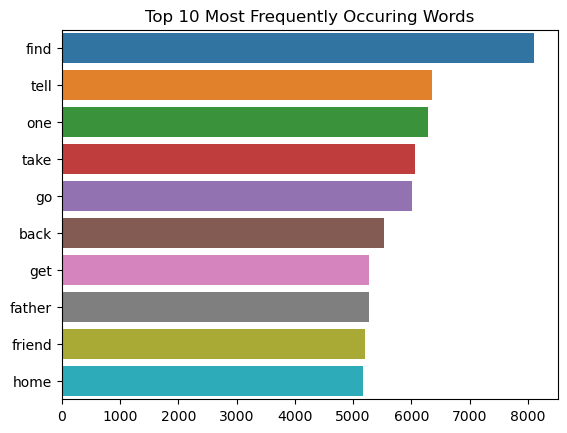

In [24]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

# ngramns

In [25]:
#df.dropna(inplace=True)

In [26]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['ProcessedPlot'])


In [ ]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [ ]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['ProcessedPlot'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()